# Text classification Web KB

In [2]:
import neural_structured_learning as nsl
import pandas as pd
import tensorflow as tf

In [22]:
content = pd.read_csv("WebKB/wisconsin.content", sep="	", header=None)

In [23]:
cites = pd.read_csv("WebKB/wisconsin.cites", sep=" ", header=None)

In [30]:
content[1704].value_counts()

student    122
course      76
faculty     35
project     22
staff       10
Name: 1704, dtype: int64

In [29]:
cites.head()

,0,1
0,http://robios8.me.wisc.edu,http://www.cs.wisc.edu/~shavlik/cs540-all.html
1,http://robios8.me.wisc.edu,http://www.cs.wisc.edu/~shavlik/uwml.html
2,http://robios8.me.wisc.edu/~lumelsky/lumelsky....,http://robios8.me.wisc.edu
3,http://robios8.me.wisc.edu/~lumelsky/lumelsky....,http://www.cs.wisc.edu/~hert/hert.html
4,http://www.cae.wisc.edu/~ece552,http://www.cs.wisc.edu/~raman/raman.html


In [31]:
cites.to_csv('wisconsin_new.cites', sep="\t", header = False, index=False)
content.to_csv('wisconsin_new.content', sep="\t", header = False, index=False)

In [293]:
cornell_cites = pd.read_csv("WebKB/cornell.cites", sep=" ", header=None)

In [295]:
cornell_cites.head()
cornell_cites.to_csv('cornell_new.cites', sep="\t", header = False, index=False)

In [303]:
pd.read_csv("cornell_new.cites", sep="\t")

,http://cam.cornell.edu/~baggett/index.html,http://www.cs.cornell.edu/info/people/lnt/lnt.html
0,http://cam.cornell.edu/ph/index.html,http://www.cs.cornell.edu/info/people/vavasis/...
1,http://cs.cornell.edu/info/courses/current/cs4...,http://www.cs.cornell.edu/info/people/diyu/y.html
2,http://cs.cornell.edu/info/courses/fall-95/cs4...,http://www.cs.cornell.edu/info/people/indira/h...
3,http://cs.cornell.edu/info/courses/fall-95/cs4...,http://www.cs.cornell.edu/info/people/seena/ho...
4,http://cs.cornell.edu/info/courses/spring-96/c...,http://www.cs.cornell.edu/info/people/diyu/y.html
...,...,...
298,http://www.tc.cornell.edu/visualization/educat...,http://www.cs.cornell.edu/info/people/kartikhk...
299,http://www.tc.cornell.edu/visualization/educat...,http://www.cs.cornell.edu/info/people/scl/sean...
300,http://www.tc.cornell.edu/visualization/educat...,http://www.cs.cornell.edu/info/people/seena/ho...
301,http://www.tc.cornell.edu/visualization/educat...,http://www.cs.cornell.edu/info/people/suzuki/s...


In [298]:
cornell_content = pd.read_csv("WebKB/cornell.content", sep="\t", header=None)

In [299]:
cornell_content.head()

,0,1,2,3,4,5,6,7,8,9,...,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704
0,http://cam.cornell.edu/ph/index.html,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,student
1,http://cam.cornell.edu/~baggett/index.html,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,student
2,http://cs-tr.cs.cornell.edu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,project
3,http://cs.cornell.edu/info/courses/current/cs4...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,course
4,http://cs.cornell.edu/info/courses/fall-95/cs4...,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,course


In [51]:
!tar -C /tmp -xvzf /Users/johanweisshansen/Documents/DTU/3.semester/advanced_project/oticon_project/terror_data/nsl/dataset_test_5/data/collected.tgz

x collected.content
x collected.cites


In [52]:
!python preprocess_webkb_dataset.py \
--input_content=/tmp/collected.content \
--input_graph=/tmp/collected.cites \
--max_nbrs=5 \
--output_train_data=/tmp/train_merged_examples.tfr \
--output_test_data=/tmp/test_examples.tfr

preprocess_webkb_dataset.py:128: DeprecationWarning: 'U' mode is deprecated
  with open(in_file, 'rU') as cora_content:
Reading graph file: /tmp/collected.cites...
Done reading 1608 edges from: /tmp/collected.cites (0.00 seconds).
Making all edges bi-directional...
Done (0.00 seconds). Total graph nodes: 877
Joining seed and neighbor tf.train.Examples with graph edges...
Done creating and writing 51 merged tf.train.Examples (0.03 seconds).
Out-degree histogram: [(1, 20), (2, 15), (3, 8), (4, 3), (5, 5)]
Output training data written to TFRecord file: /tmp/train_merged_examples.tfr.
Output test data written to TFRecord file: /tmp/test_examples.tfr.
Total running time: 0.01 minutes.


In [53]:
### Experiment dataset
TRAIN_DATA_PATH = '/tmp/train_merged_examples.tfr'
TEST_DATA_PATH = '/tmp/test_examples.tfr'

### Constants used to identify neighbor features in the input.
NBR_FEATURE_PREFIX = 'NL_nbr_'
NBR_WEIGHT_SUFFIX = '_weight'

In [54]:
class HParams(object):
  """Hyperparameters used for training."""
  def __init__(self):
    ### dataset parameters
    self.num_classes = 5
    self.max_seq_length = 1703
    ### neural graph learning parameters
    self.distance_type = nsl.configs.DistanceType.L2
    self.graph_regularization_multiplier = 0.1
    self.num_neighbors = 1
    ### model architecture
    self.num_fc_units = [50,50]
    ### training parameters
    self.train_epochs = 70
    self.batch_size = 20
    self.dropout_rate = 0.5
    ### eval parameters
    self.eval_steps = None  # All instances in the test set are evaluated.

HPARAMS = HParams()

In [55]:
def parse_example(example_proto):
  """Extracts relevant fields from the `example_proto`.

  Args:
    example_proto: An instance of `tf.train.Example`.

  Returns:
    A pair whose first value is a dictionary containing relevant features
    and whose second value contains the ground truth labels.
  """
  # The 'words' feature is a multi-hot, bag-of-words representation of the
  # original raw text. A default value is required for examples that don't
  # have the feature.
  feature_spec = {
      'words':
          tf.io.FixedLenFeature([HPARAMS.max_seq_length],
                                tf.int64,
                                default_value=tf.constant(
                                    0,
                                    dtype=tf.int64,
                                    shape=[HPARAMS.max_seq_length])),
      'label':
          tf.io.FixedLenFeature((), tf.int64, default_value=-1),
  }
  # We also extract corresponding neighbor features in a similar manner to
  # the features above.
  for i in range(HPARAMS.num_neighbors):
    nbr_feature_key = '{}{}_{}'.format(NBR_FEATURE_PREFIX, i, 'words')
    nbr_weight_key = '{}{}{}'.format(NBR_FEATURE_PREFIX, i, NBR_WEIGHT_SUFFIX)
    feature_spec[nbr_feature_key] = tf.io.FixedLenFeature(
        [HPARAMS.max_seq_length],
        tf.int64,
        default_value=tf.constant(
            0, dtype=tf.int64, shape=[HPARAMS.max_seq_length]))

    # We assign a default value of 0.0 for the neighbor weight so that
    # graph regularization is done on samples based on their exact number
    # of neighbors. In other words, non-existent neighbors are discounted.
    feature_spec[nbr_weight_key] = tf.io.FixedLenFeature(
        [1], tf.float32, default_value=tf.constant([0.0]))

  features = tf.io.parse_single_example(example_proto, feature_spec)

  labels = features.pop('label')
  return features, labels


def make_dataset(file_path, training=False):
  """Creates a `tf.data.TFRecordDataset`.

  Args:
    file_path: Name of the file in the `.tfrecord` format containing
      `tf.train.Example` objects.
    training: Boolean indicating if we are in training mode.

  Returns:
    An instance of `tf.data.TFRecordDataset` containing the `tf.train.Example`
    objects.
  """
  dataset = tf.data.TFRecordDataset([file_path])
  if training:
    dataset = dataset.shuffle(10000)
  dataset = dataset.map(parse_example)
  dataset = dataset.batch(HPARAMS.batch_size)
  return dataset


train_dataset = make_dataset(TRAIN_DATA_PATH, training=True)
test_dataset = make_dataset(TEST_DATA_PATH)

In [56]:
for feature_batch, label_batch in train_dataset.take(1):
    print('Feature list:', list(feature_batch.keys()))
    print('Batch of inputs:', feature_batch['words'])
    nbr_feature_key = '{}{}_{}'.format(NBR_FEATURE_PREFIX, 0, 'words')
    nbr_weight_key = '{}{}{}'.format(NBR_FEATURE_PREFIX, 0, NBR_WEIGHT_SUFFIX)
    print('Batch of neighbor inputs:', feature_batch[nbr_feature_key])
    print('Batch of neighbor weights:',
        tf.reshape(feature_batch[nbr_weight_key], [-1]))
    print('Batch of labels:', label_batch)

Feature list: ['NL_nbr_0_weight', 'NL_nbr_0_words', 'words']
Batch of inputs: tf.Tensor(
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]], shape=(20, 1703), dtype=int64)
Batch of neighbor inputs: tf.Tensor(
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]], shape=(20, 1703), dtype=int64)
Batch of neighbor weights: tf.Tensor([1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(20,), dtype=float32)
Batch of labels: tf.Tensor([3 1 1 0 3 0 1 2 1 2 0 0 1 0 1 2 0 2 1 1], shape=(20,), dtype=int64)


In [57]:
def make_mlp_functional_model(hparams):
  """Creates a functional API-based multi-layer perceptron model."""
  inputs = tf.keras.Input(
      shape=(hparams.max_seq_length,), dtype='int64', name='words')

  # Input is already one-hot encoded in the integer format. We cast it to
  # floating point format here.
  cur_layer = tf.keras.layers.Lambda(
      lambda x: tf.keras.backend.cast(x, tf.float32))(
          inputs)

  for num_units in hparams.num_fc_units:
    cur_layer = tf.keras.layers.Dense(num_units, activation='relu')(cur_layer)
    # For functional models, by default, Keras ensures that the 'dropout' layer
    # is invoked only during training.
    cur_layer = tf.keras.layers.Dropout(hparams.dropout_rate)(cur_layer)
    cur_layer = tf.keras.layers.BatchNormalization()(cur_layer) 

  outputs = tf.keras.layers.Dense(
      hparams.num_classes, activation='softmax')(
          cur_layer)

  model = tf.keras.Model(inputs, outputs=outputs)
  return model

In [58]:
base_model_tag, base_model = 'FUNCTIONAL', make_mlp_functional_model(HPARAMS)
base_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
words (InputLayer)           [(None, 1703)]            0         
_________________________________________________________________
lambda_4 (Lambda)            (None, 1703)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                85200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 50)                200       
_________________________________________________________________
dense_13 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0   

In [59]:
# Compile and train the base MLP model
base_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
base_model_history = base_model.fit(train_dataset, epochs=HPARAMS.train_epochs, verbose=1, validation_data=test_dataset)

Epoch 1/70
3/3 [==============================] - 1s 312ms/step - loss: 2.1621 - accuracy: 0.2353 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/70
3/3 [==============================] - 0s 42ms/step - loss: 2.1392 - accuracy: 0.2157 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/70
3/3 [==============================] - 0s 42ms/step - loss: 1.9258 - accuracy: 0.1765 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/70
3/3 [==============================] - 0s 42ms/step - loss: 1.9744 - accuracy: 0.2941 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/70
3/3 [==============================] - 0s 41ms/step - loss: 1.4431 - accuracy: 0.4510 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/70
3/3 [==============================] - 0s 36ms/step - loss: 1.5056 - accuracy: 0.4314 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/70
3/3 [==============================] - 0s 42ms/step - loss: 1.5568 - accuracy: 0.3725 - val_loss: 0.0000e+

3/3 [==============================] - 0s 32ms/step - loss: 0.7786 - accuracy: 0.7451 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 57/70
3/3 [==============================] - 0s 33ms/step - loss: 0.5413 - accuracy: 0.8431 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 58/70
3/3 [==============================] - 0s 35ms/step - loss: 0.6319 - accuracy: 0.7843 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 59/70
3/3 [==============================] - 0s 34ms/step - loss: 0.6850 - accuracy: 0.7255 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 60/70
3/3 [==============================] - 0s 34ms/step - loss: 0.5426 - accuracy: 0.8431 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 61/70
3/3 [==============================] - 0s 35ms/step - loss: 0.5648 - accuracy: 0.8235 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 62/70
3/3 [==============================] - 0s 36ms/step - loss: 0.6226 - accuracy: 0.8235 - val_loss: 0.0000e+00 - v

In [60]:
base_model_history

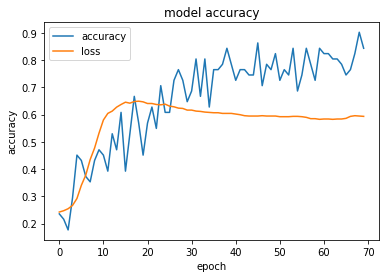

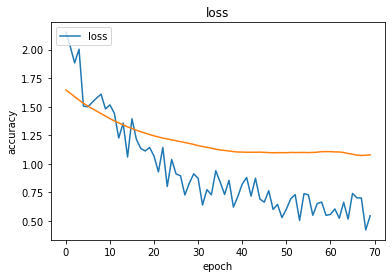

In [61]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(base_model_history.history['accuracy'])
plt.plot(base_model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

plt.plot(base_model_history.history['loss'])
plt.plot(base_model_history.history['val_loss'])
plt.title('loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

In [62]:
# Helper function to print evaluation metrics.
def print_metrics(model_desc, eval_metrics):
  """Prints evaluation metrics.

  Args:
    model_desc: A description of the model.
    eval_metrics: A dictionary mapping metric names to corresponding values. It
      must contain the loss and accuracy metrics.
  """
  print('\n')
  print('Eval accuracy for ', model_desc, ': ', eval_metrics['accuracy'])
  print('Eval loss for ', model_desc, ': ', eval_metrics['loss'])
  if 'graph_loss' in eval_metrics:
    print('Eval graph loss for ', model_desc, ': ', eval_metrics['graph_loss'])

In [63]:
eval_results_base_model = dict(
    zip(base_model.metrics_names,
        base_model.evaluate(test_dataset, steps=HPARAMS.eval_steps)))
print_metrics('Base MLP model', eval_results_base_model)

42/42 [==============================] - 0s 4ms/step - loss: 1.0783 - accuracy: 0.5932


Eval accuracy for  Base MLP model :  0.59322035
Eval loss for  Base MLP model :  1.0782668718269892


# Graph learning

In [64]:
# Build a new base MLP model.
base_reg_model_tag, base_reg_model = 'FUNCTIONAL', make_mlp_functional_model(
    HPARAMS)

In [65]:
# Wrap the base MLP model with graph regularization.
graph_reg_config = nsl.configs.make_graph_reg_config(
    max_neighbors=HPARAMS.num_neighbors,
    multiplier=HPARAMS.graph_regularization_multiplier,
    distance_type=HPARAMS.distance_type,
    sum_over_axis=-1)
graph_reg_model = nsl.keras.GraphRegularization(base_reg_model,
                                                graph_reg_config)
graph_reg_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
graph_reg_history = graph_reg_model.fit(train_dataset, epochs=HPARAMS.train_epochs, verbose=1, validation_data=test_dataset)

Epoch 1/70


/Users/johanweisshansen/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/johanweisshansen/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


3/3 [==============================] - 3s 1s/step - loss: 2.2271 - accuracy: 0.1373 - graph_loss: 0.4039 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 2/70
3/3 [==============================] - 0s 38ms/step - loss: 2.2600 - accuracy: 0.2157 - graph_loss: 0.4282 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 3/70
3/3 [==============================] - 0s 37ms/step - loss: 2.0981 - accuracy: 0.2745 - graph_loss: 0.4590 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 4/70
3/3 [==============================] - 0s 37ms/step - loss: 2.0570 - accuracy: 0.1765 - graph_loss: 0.3564 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 5/70
3/3 [==============================] - 0s 37ms/step - loss: 1.8896 - accuracy: 0.3529 - graph_loss: 0.3563 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 6/70
3/3 [============

3/3 [==============================] - 0s 40ms/step - loss: 0.9116 - accuracy: 0.6471 - graph_loss: 0.3880 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 43/70
3/3 [==============================] - 0s 40ms/step - loss: 1.0215 - accuracy: 0.7255 - graph_loss: 0.4052 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 44/70
3/3 [==============================] - 0s 45ms/step - loss: 1.0688 - accuracy: 0.5686 - graph_loss: 0.4222 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 45/70
3/3 [==============================] - 0s 36ms/step - loss: 0.9050 - accuracy: 0.6471 - graph_loss: 0.4548 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 46/70
3/3 [==============================] - 0s 37ms/step - loss: 1.0549 - accuracy: 0.6471 - graph_loss: 0.4331 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_graph_loss: 0.0000e+00
Epoch 47/70
3/3 [=====

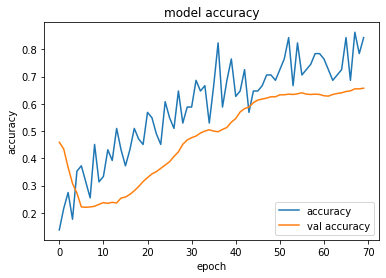

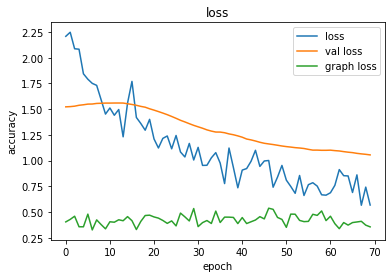

In [66]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(graph_reg_history.history['accuracy'])
plt.plot(graph_reg_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val accuracy'], loc='lower right')
plt.show()

plt.plot(graph_reg_history.history['loss'])
plt.plot(graph_reg_history.history['val_loss'])
plt.plot(graph_reg_history.history['graph_loss'])
plt.title('loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'val loss', 'graph loss'], loc='upper right')
plt.show()

In [67]:
eval_results_graph_regulated_model = dict(
    zip(graph_reg_model.metrics_names,
        graph_reg_model.evaluate(test_dataset, steps=HPARAMS.eval_steps)))
print_metrics('MLP + graph regularization', eval_results_graph_regulated_model)

42/42 [==============================] - 0s 5ms/step - loss: 1.0554 - accuracy: 0.6574 - graph_loss: 0.0000e+00


Eval accuracy for  MLP + graph regularization :  0.657385
Eval loss for  MLP + graph regularization :  1.055415697041012
Eval graph loss for  MLP + graph regularization :  0.0


In [68]:
graph_collected = []

graph_collected.append(graph_reg_history.history['accuracy'])
graph_collected.append(graph_reg_history.history['accuracy'])

In [32]:
graph_collected

[[0.29419193,
  0.43560606,
  0.530303,
  0.60227275,
  0.67171717,
  0.67676765,
  0.71843433,
  0.7323232,
  0.7323232,
  0.75883836,
  0.78156567,
  0.78409094,
  0.81060606,
  0.79545456,
  0.82323235,
  0.81313133,
  0.8320707,
  0.8194444,
  0.83964646,
  0.83838385,
  0.84090906,
  0.85353535,
  0.83964646,
  0.85858583,
  0.8598485,
  0.86868685,
  0.86868685,
  0.89772725,
  0.87247473,
  0.87247473,
  0.8699495,
  0.8800505,
  0.8939394,
  0.8787879,
  0.90656567,
  0.9002525,
  0.8863636,
  0.88383836,
  0.88257575,
  0.9040404,
  0.915404,
  0.8939394,
  0.9027778,
  0.89772725,
  0.9229798,
  0.91161615,
  0.9191919,
  0.91035354,
  0.90909094,
  0.9141414,
  0.9128788,
  0.92171717,
  0.92424244,
  0.91161615,
  0.9078283,
  0.90656567,
  0.91161615,
  0.9166667,
  0.92045456,
  0.92676765,
  0.92171717,
  0.9166667,
  0.9318182,
  0.9229798,
  0.93813133,
  0.9292929,
  0.91161615,
  0.92171717,
  0.9419192,
  0.93939394],
 [0.29419193,
  0.43560606,
  0.530303,
  0.6022

In [34]:
test_columns = np.arange(0,70, 1)
len(test_columns)

NameError: name 'np' is not defined

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(graph_reg_history.history['accuracy'])
plt.plot(graph_reg_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val accuracy'], loc='lower right')

# cell_text = []
for row in range(len(graph_reg_history.history['accuracy'])):
    plt.table(cellText="test",
                      rowLabels="rows",
                      colLabels='col',
                      loc='bottom')
#     plt.plot(index, graph_reg_history.history['accuracy'][row], bottom=y_offset)
#     y_offset = y_offset + data[row]
#     cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])


plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')
table.show()




In [ ]:
cell_text

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

columns = test_columns
rows = ['base model', 'graph model']


# Get some pastel shades for the colors
n_rows = len(graph_collected)

index = np.arange(len(columns)) + 0.3

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):

    y_offset = y_offset + graph_collected[row]
    cell_text.append(['%1.4f' % x for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

# plt.plot(graph_collected)
plt.plot(graph_reg_history.history['accuracy'])

# plt.ylabel("Loss in ${0}'s".format(value_increment))
# plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()